# Pymaceuticals Inc.
---

### Analysis

1. The correlation between mouse weight and average tumor volume is a positive correlation of 0.834, meaning that the larger the mouse, the larger the tumor. 

2) The ration of males to females was distributed evenly, with 51% of the subjects male and 49% female.

3) The final tumor volume for mice on the regimen of 'Capomulin' and 'Ramicane' was considerably smaller than those 'Infubinol' and 'Ceftamin'. Further analysis should be done on the distribution of weight in these 4 groups, as their is a known correlation between weight and tumor volume
 

In [302]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
com_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
com_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [145]:
# Checking the number of mice. 249
com_df['Mouse ID'].nunique()

249

In [146]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# array(['g989'], dtype=object)
dups_df = com_df[com_df.duplicated(['Mouse ID','Timepoint'], keep=False)]
dups_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 908 to 917
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            10 non-null     object 
 1   Drug Regimen        10 non-null     object 
 2   Sex                 10 non-null     object 
 3   Age_months          10 non-null     int64  
 4   Weight (g)          10 non-null     int64  
 5   Timepoint           10 non-null     int64  
 6   Tumor Volume (mm3)  10 non-null     float64
 7   Metastatic Sites    10 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 720.0+ bytes


In [148]:
# Optional: Get all the data for the duplicate mouse ID. 
dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [149]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
com_df = com_df[com_df['Mouse ID'] != 'g989']


In [150]:
# Checking the number of mice in the clean DataFrame.
com_df['Mouse ID'].nunique()

248

## Summary Statistics

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor = com_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index()
mean_tumor = mean_tumor.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

median_tumor = com_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index()
median_tumor = median_tumor.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})

var_tumor = com_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index()
var_tumor = var_tumor.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})

std_tumor = com_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index()
std_tumor = std_tumor.rename(columns={'Tumor Volume (mm3)':'STD of Tumor Volume'})

sem_tumor = com_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index()
sem_tumor = sem_tumor.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.' })

# Assemble the resulting series into a single summary DataFrame.
sum_tab = pd.merge(mean_tumor, median_tumor, on = "Drug Regimen", how = "outer")
sum_tab = pd.merge(sum_tab, var_tumor, on = "Drug Regimen", how = "outer")
sum_tab = pd.merge(sum_tab, std_tumor, on = "Drug Regimen", how = "outer")
sum_tab = pd.merge(sum_tab, sem_tumor, on = "Drug Regimen", how = "outer")
sum_tab

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,STD of Tumor Volume,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
com_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

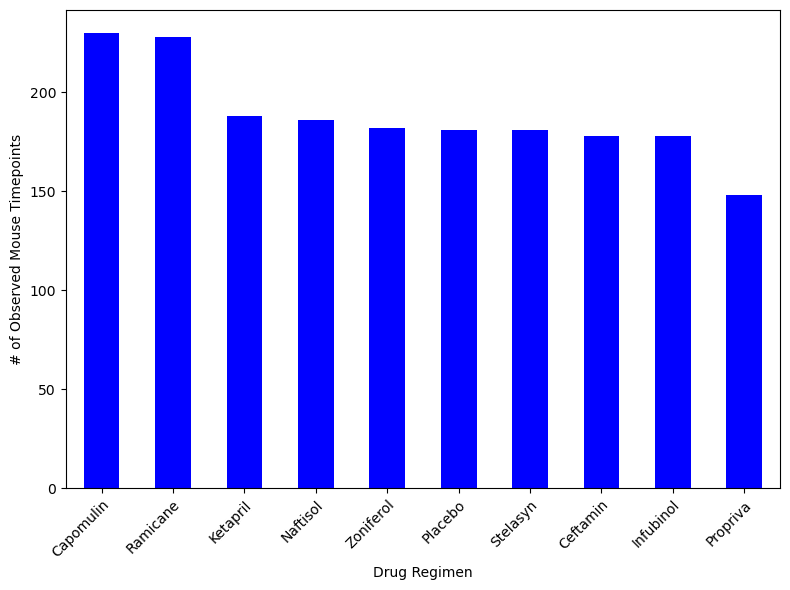

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#creates data for bar chart
mouse_time_count = com_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

#plots bar chart
Figure1 = mouse_time_count.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

# Configure tick marks
xticklabels = mouse_time_count.index
Figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.tight_layout()
plt.show()

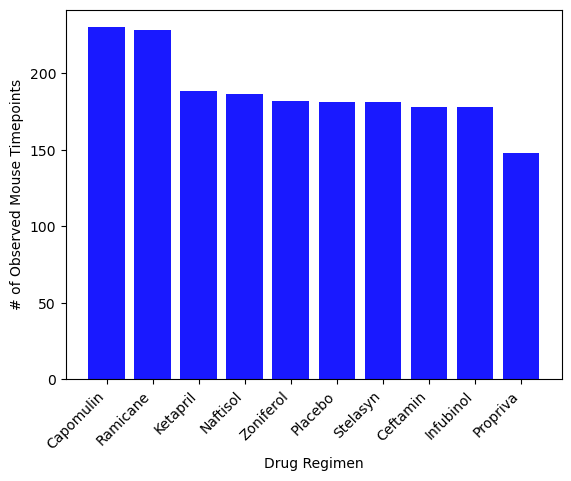

In [154]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mouse_time_count.index
m_count = mouse_time_count.values
plt.bar(drugs,m_count, color= "Blue", alpha = .9, align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45, ha='right')
plt.show()

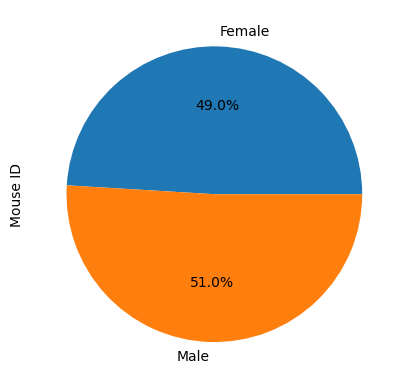

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#creates data for pie plot
mouse_sex = com_df.groupby('Sex')['Mouse ID'].count()/com_df['Mouse ID'].count()*100
# creates pie plot

mouse_sex.plot(kind='pie', y='Sex', autopct='%.1f%%')
plt.show()

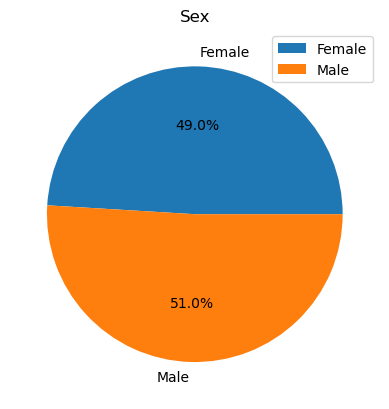

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# mouse_sex = mouse_sex.map('{:.1f}%'.format)

label_sex = mouse_sex.index
prop_sex = mouse_sex.values

fig, ax = fig, ax = plt.subplots()
ax.pie(prop_sex, labels = label_sex, autopct='%.1f%%')
plt.legend()
ax.set_title('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [211]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

#Cuts dataset downt to relevant drugs
temp_vol_df = com_df.loc[(com_df["Drug Regimen"] == "Capomulin")|(com_df["Drug Regimen"] == "Ramicane")|(com_df["Drug Regimen"] == "Infubinol")|(com_df["Drug Regimen"] == "Ceftamin"),:]

# #finds max timepoint for each amount
temp_vol_df = temp_vol_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

fin_vol_df = pd.merge(temp_vol_df,com_df, on=("Mouse ID","Timepoint"), how = 'left')
fin_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [222]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []



## Calculate the IQR and quantitatively determine if there are any potential outliers. 

 
    # Locate the rows which contain mice on each drug and get the tumor volumes

#Capomulin    
    # Create tumor dataset by regimen
cap_vol = fin_vol_df.loc[(fin_vol_df['Drug Regimen'] == "Capomulin"),:]
cap_vol = cap_vol['Tumor Volume (mm3)']

#Calculate quartiles and IQR
quartiles =cap_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq 

    
    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [224]:
#Ramicane    
    # Create tumor dataset by regimen
ram_vol = fin_vol_df.loc[(fin_vol_df['Drug Regimen'] == "Ramicane"),:]
ram_vol = ram_vol['Tumor Volume (mm3)']

#Calculate quartiles and IQR
quartiles =cap_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq 

    
    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 32.37735684
The upper quartile of Ramicane tumors: 40.1592203
The interquartile range of Ramicane tumors: 7.781863460000004
The median of Ramicane tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [225]:
#Infubinol  
    # Create tumor dataset by regimen
inf_vol = fin_vol_df.loc[(fin_vol_df['Drug Regimen'] == "Infubinol"),:]
inf_vol = inf_vol['Tumor Volume (mm3)']

#Calculate quartiles and IQR
quartiles =cap_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq 

    
    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 32.37735684
The upper quartile of Infubinol tumors: 40.1592203
The interquartile range of Infubinol tumors: 7.781863460000004
The median of Infubinol tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [226]:
#Ceftamin  
    # Create tumor dataset by regimen
cef_vol = fin_vol_df.loc[(fin_vol_df['Drug Regimen'] == "Ceftamin"),:]
cef_vol = cef_vol['Tumor Volume (mm3)']

#Calculate quartiles and IQR
quartiles =cap_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq 

    
    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 32.37735684
The upper quartile of Ceftamin tumors: 40.1592203
The interquartile range of Ceftamin tumors: 7.781863460000004
The median of Infubinol tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


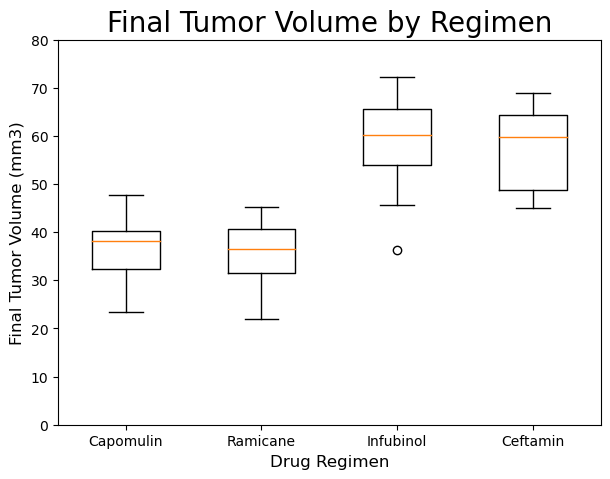

In [247]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [cap_vol, ram_vol, inf_vol, cef_vol]

fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.set_title('Final Tumor Volume by Regimen',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(tumor_vol_data, labels=treatments, widths = .5,vert=True)

plt.ylim(0, 80)

plt.show()

## Line and Scatter Plots

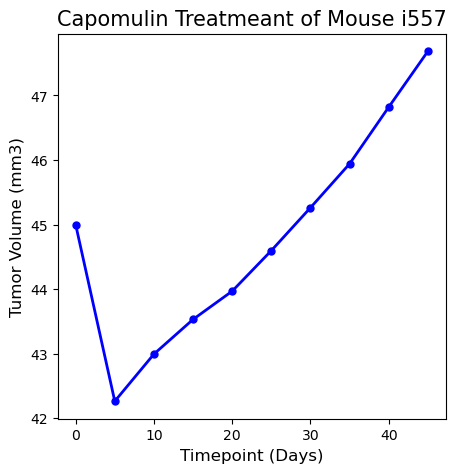

In [272]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#creates dataframe with one mouse ID from capomulin regimen
cap_case_i557 = com_df.loc[com_df['Mouse ID']== 'i557',['Timepoint', 'Tumor Volume (mm3)']]
cap_case_i557

# Plots
Fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.title('Capomulin Treatmeant of Mouse i557',fontsize =15)
plt.plot(cap_case_i557['Timepoint'], cap_case_i557['Tumor Volume (mm3)'],linewidth=2, markersize=5,marker="o",color="blue")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)

plt.show()


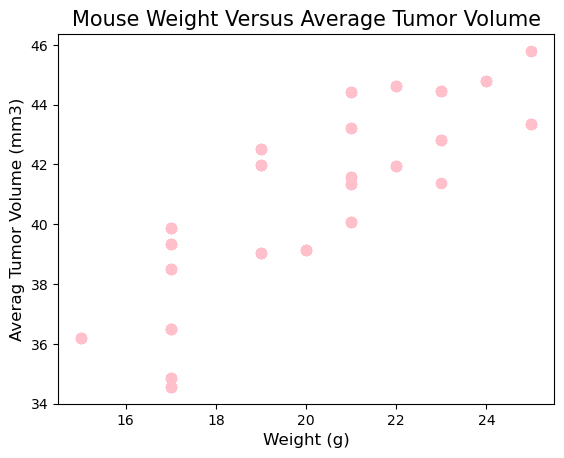

In [300]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Calculates avg tumor valume per mouse
Cap_df = com_df.loc[com_df['Drug Regimen']== 'Capomulin',['Mouse ID','Weight (g)', 'Tumor Volume (mm3)']]
Cap_avg_vol= Cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
Cap_avg_vol= pd.merge(Cap_avg_vol, com_df, on = ['Mouse ID'], how = 'left')
Cap_avg_vol = Cap_avg_vol.rename(columns={'Tumor Volume (mm3)_x': 'Avg Tumor Volume'})
Cap_avg_vol

# Plots
marker_size=5
plt.scatter(Cap_avg_vol['Weight (g)'],Cap_avg_vol['Avg Tumor Volume'],s=50, color="pink")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =15)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =12)


plt.show()

## Correlation and Regression

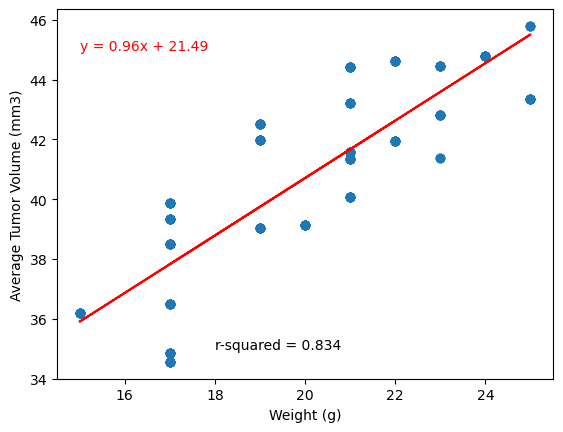

In [310]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Perform a linear regression on temperature vs. latitude
x_axis = Cap_avg_vol['Weight (g)']
y_axis = Cap_avg_vol['Avg Tumor Volume']

# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
linregress(x_axis, y_axis)

# Create line equation string
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=10,color="red")
plt.annotate("r-squared = {:.3f}".format(rvalue), (18, 35))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()